In [48]:
install.packages("ggrepel",repos="https://cran.r-project.org")
install.packages("ggplot2",repos="https://cran.r-project.org")
install.packages("lattice",repos="https://cran.r-project.org")
install.packages("scales",repos="https://cran.r-project.org")
install.packages("tidyr",repos="https://cran.r-project.org")

package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"


The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpuuAdKm\downloaded_packages


In [1]:
library("ggplot2")
library("ggrepel")
library("lattice")
library("scales")
library("tidyr")

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggrepel' was built under R version 3.3.3"Warning message:
"package 'lattice' was built under R version 3.3.3"Warning message:
"package 'scales' was built under R version 3.3.3"Warning message:
"package 'tidyr' was built under R version 3.3.3"

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

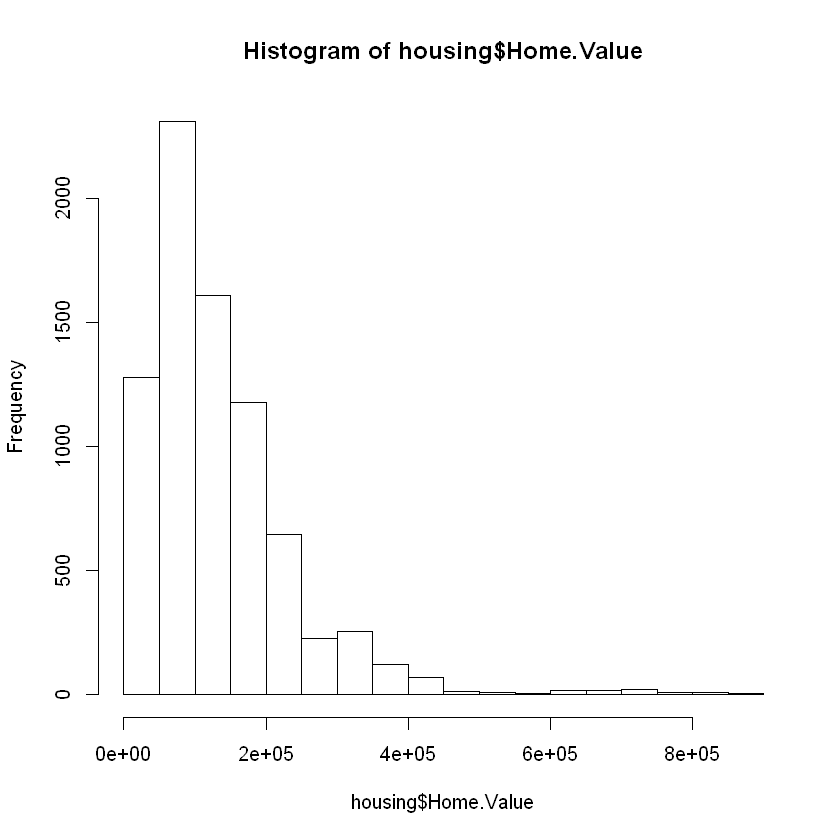

In [2]:
housing<-read.csv("D:\\cse sem2\\dic\\lab3\\Rgraphics\\Rgraphics\\dataSets\\landdata-states.csv")
head(housing[1:5])
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


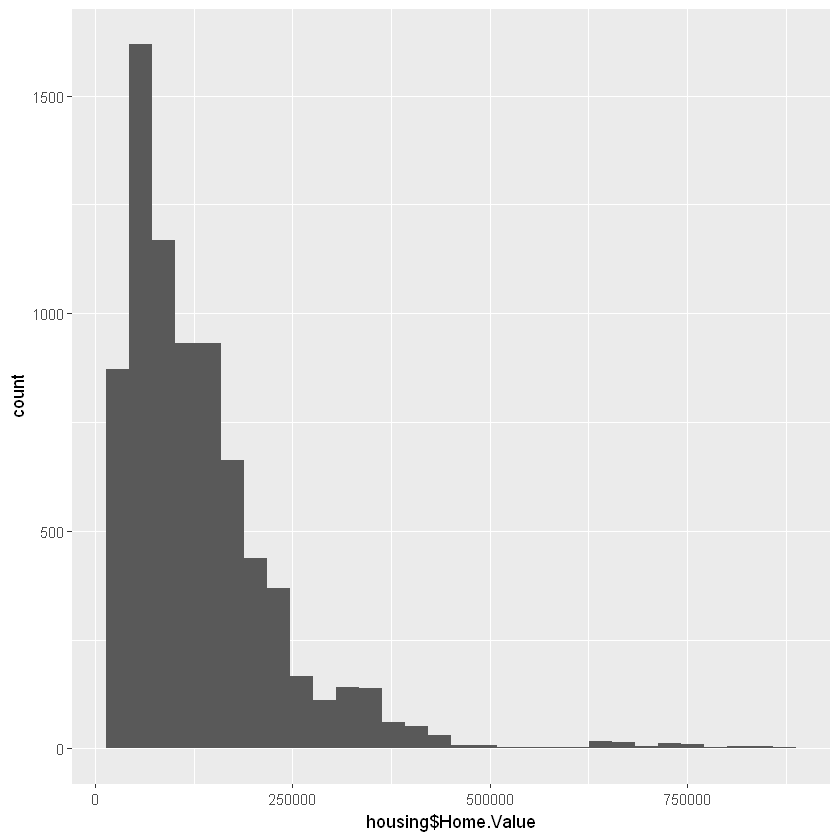

In [3]:
ggplot(housing,aes(x=housing$Home.Value))+geom_histogram()

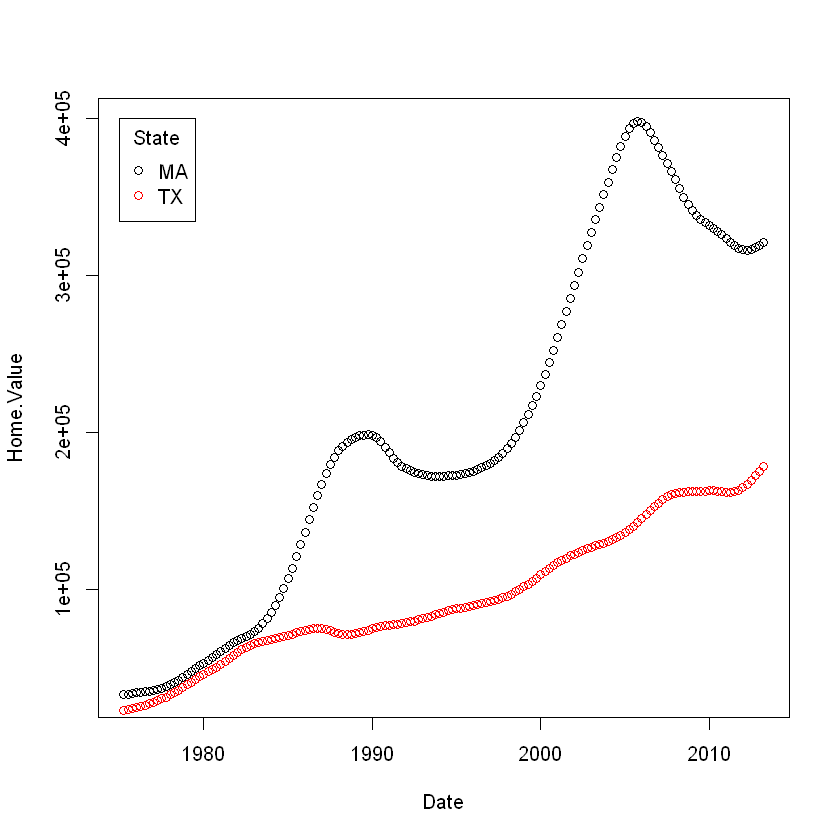

In [4]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

State region Date    Home.Value Structure.Cost Land.Value Land.Share..Pct.
5356 OK    South  1975.25 18763      17825          938        5               
     Home.Price.Index Land.Price.Index Year Qrtr
5356 0.207            0                1975 1

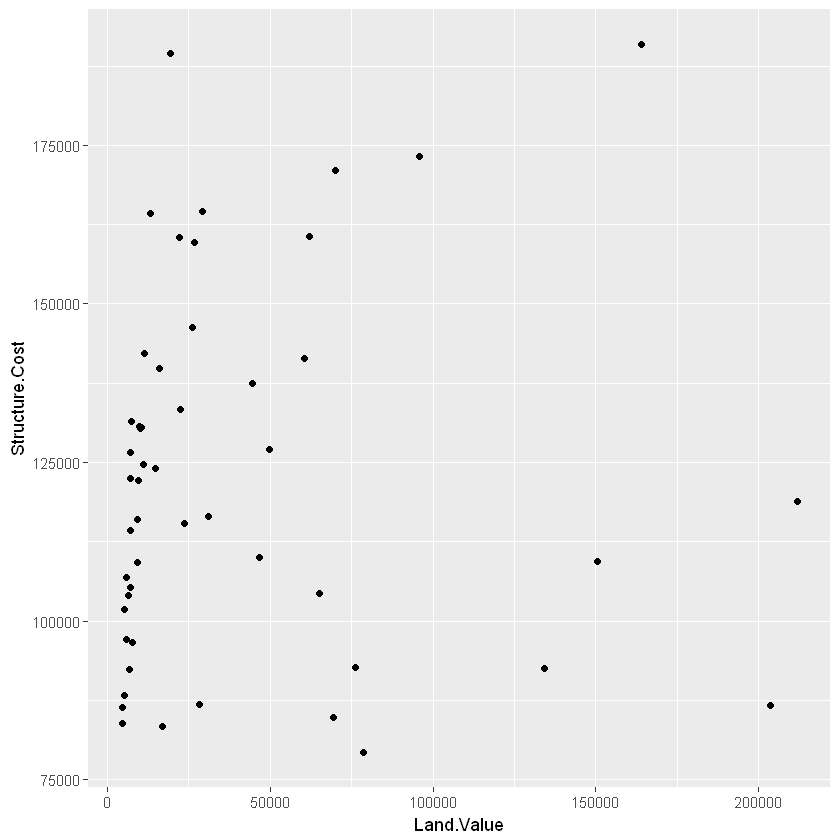

In [5]:
hp2001<-subset(housing,Date==2001.25)
ggplot(subset(housing,Date==2001.25),aes(x=Land.Value,y=Structure.Cost))+geom_point()
plott<-ggplot(subset(housing,Date==2001.25),aes(x=log(Land.Value),y=Structure.Cost))
housing[housing$Home.Value=="18763",]

`geom_smooth()` using method = 'loess'


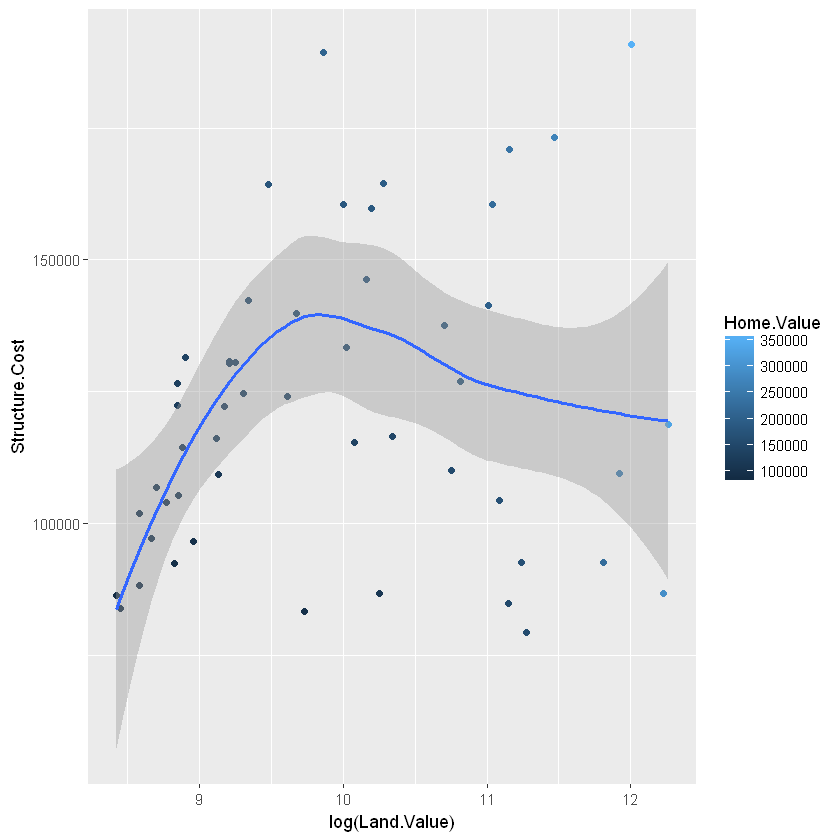

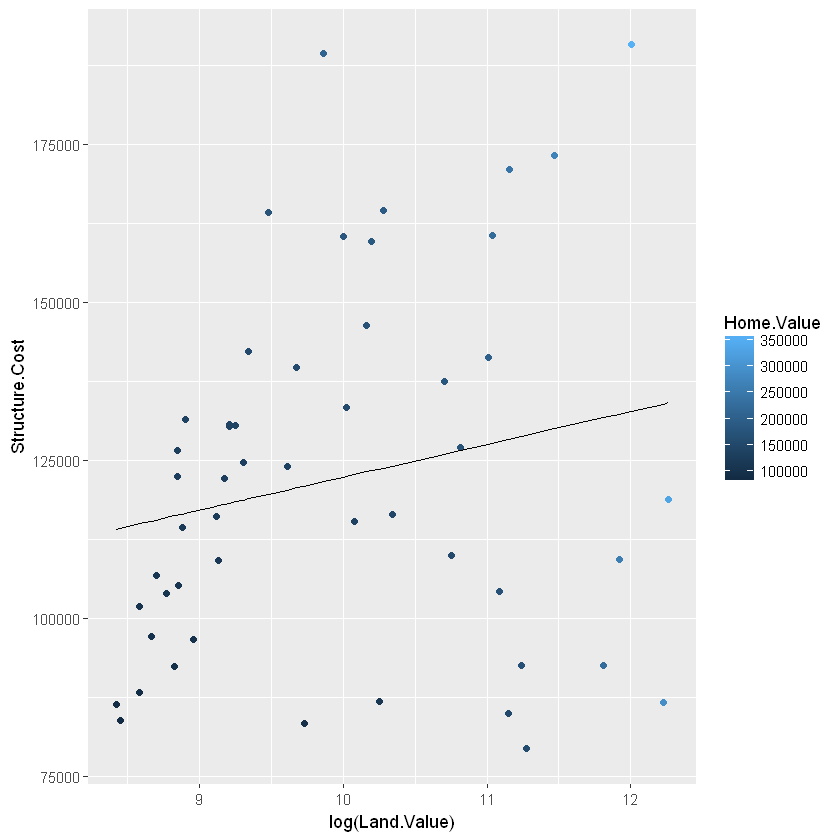

In [6]:
plt<-ggplot(subset(housing,Date==2001.25),aes(x=log(Land.Value),y=Structure.Cost))+geom_point(aes(color=Home.Value))
plt+geom_smooth()
lmodel<-predict(lm(data=hp2001,Structure.Cost~log(Land.Value)))
plt+geom_line(aes(y=lmodel))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


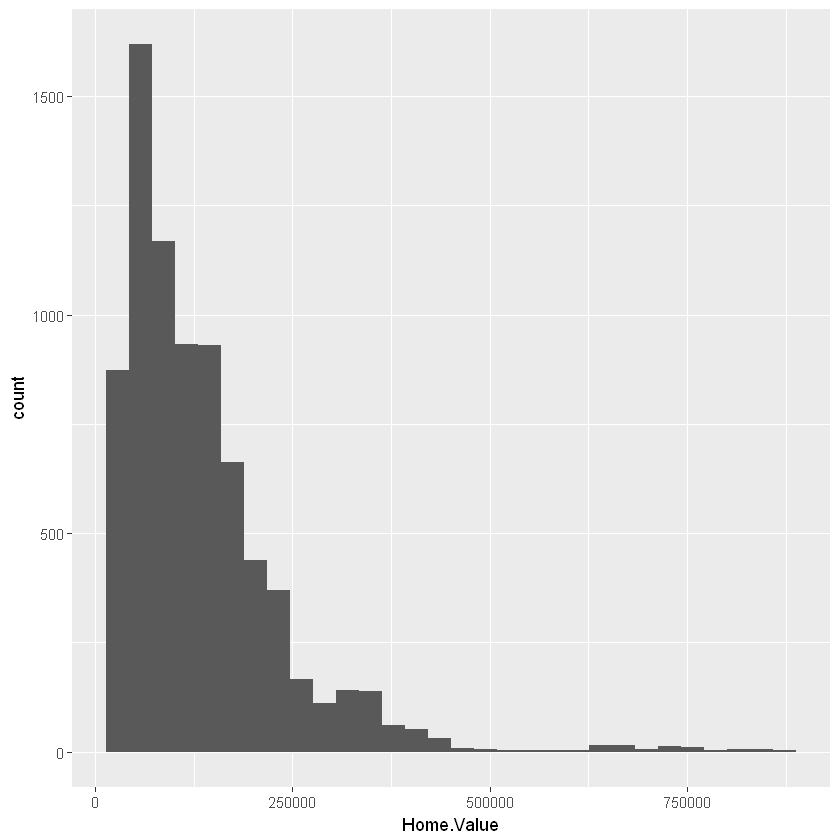

In [7]:
p2<-ggplot(housing,aes(x=Home.Value))
p2+geom_histogram()

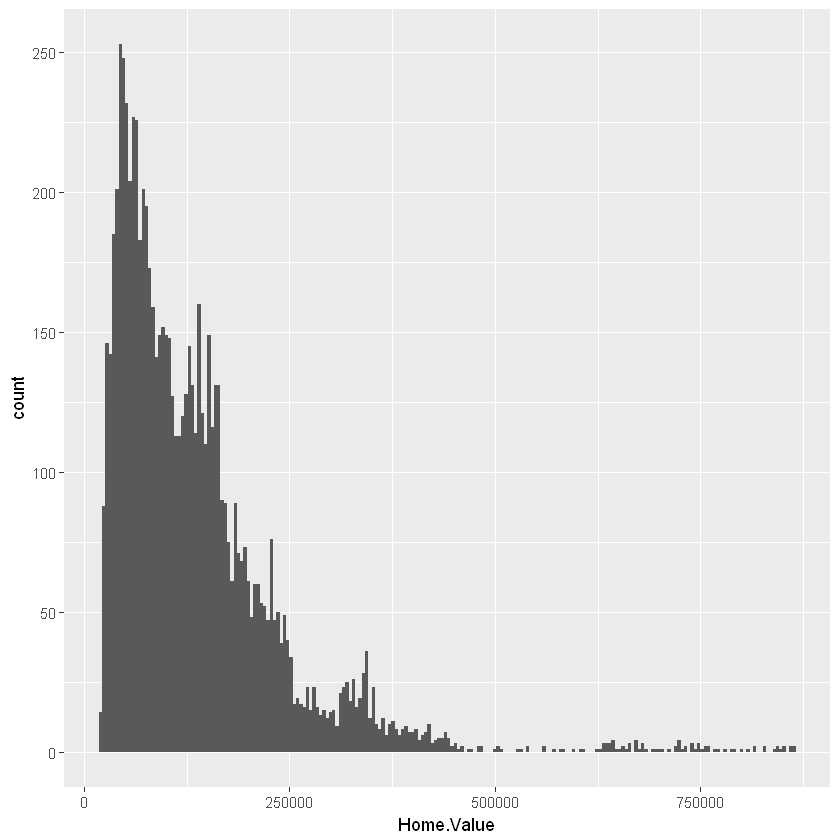

In [8]:
p2+geom_histogram(stat="bin",binwidth=4000)
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)

In [9]:
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

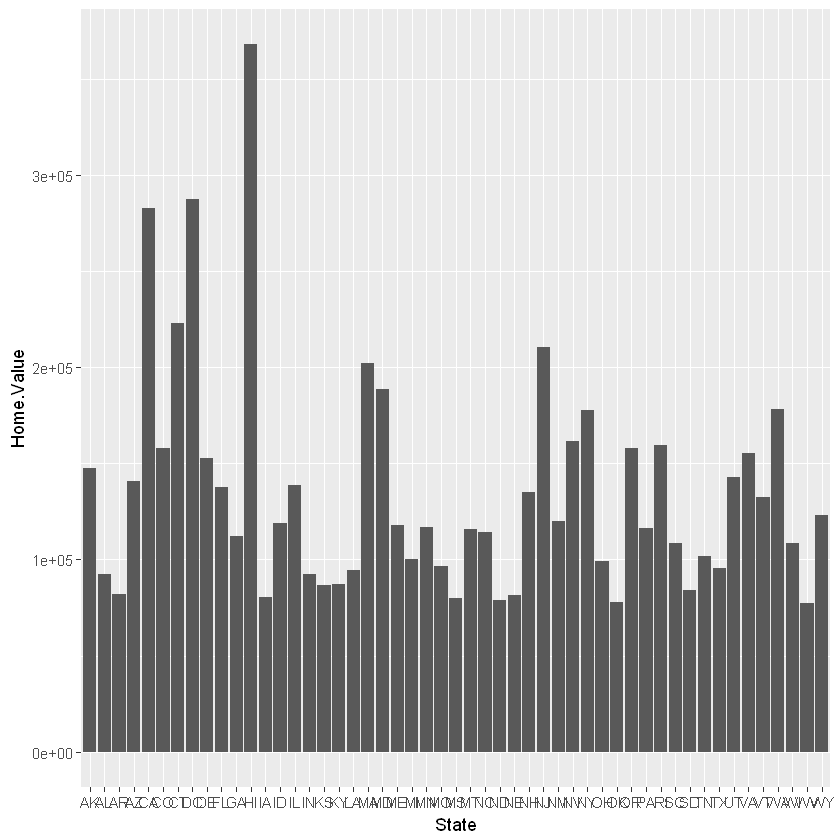

In [10]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + geom_bar(stat="identity")

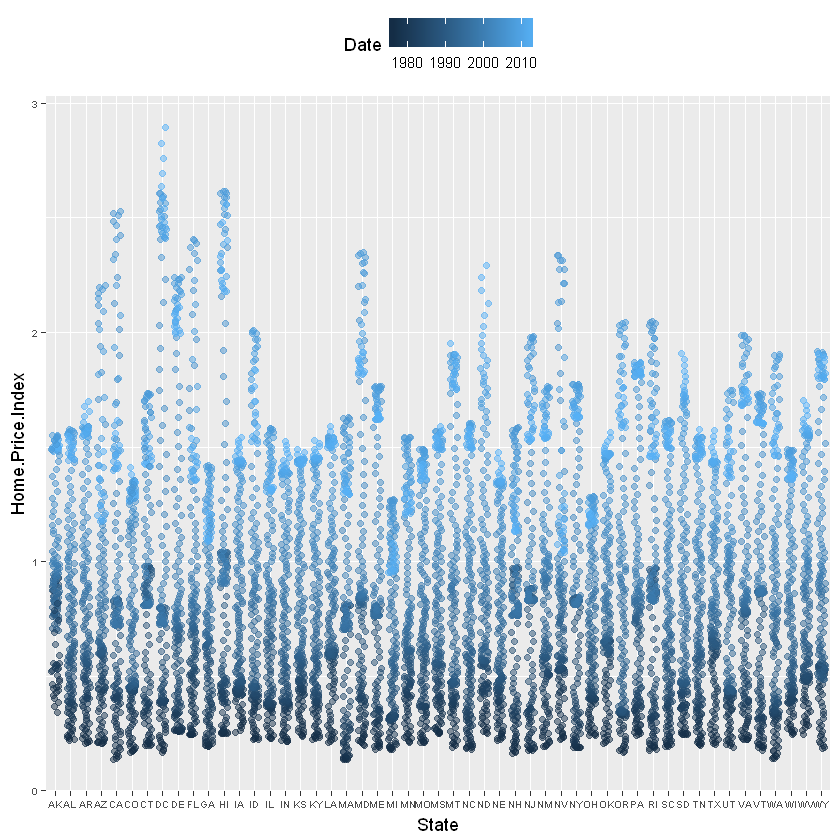

In [11]:
p3 <- ggplot(housing,aes(x = State,y = Home.Price.Index)) + theme(legend.position="top",axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),alpha = 0.5,size = 1.5,position = position_jitter(width = 0.25, height = 0)))


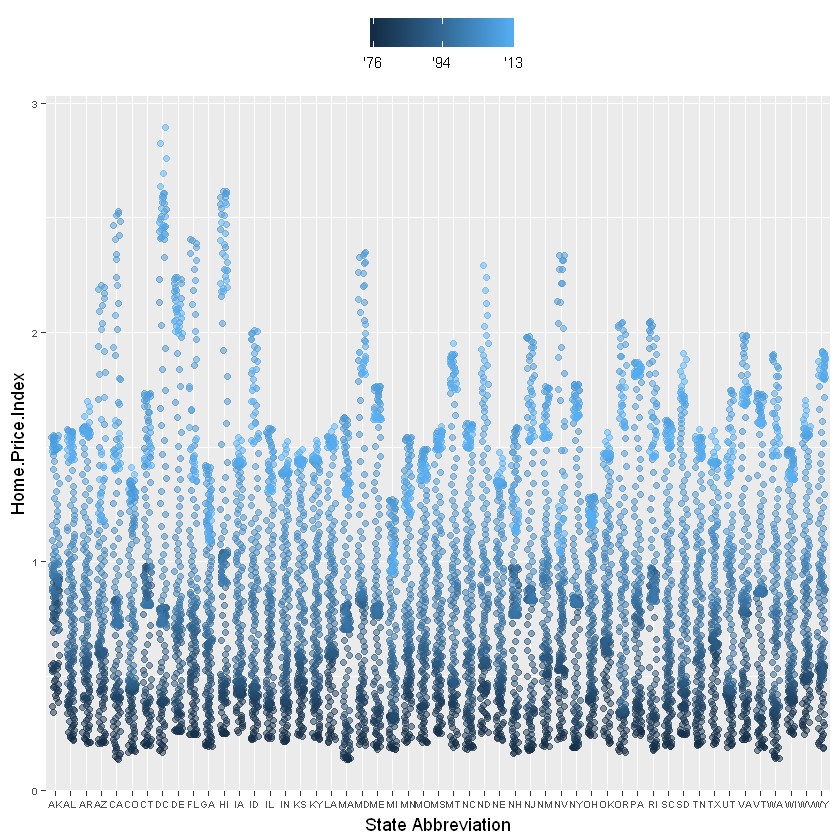

In [12]:
p4 + scale_x_discrete(name="State Abbreviation") +scale_color_continuous(name="",breaks = c(1976, 1994, 2013),labels = c("'76", "'94", "'13"))


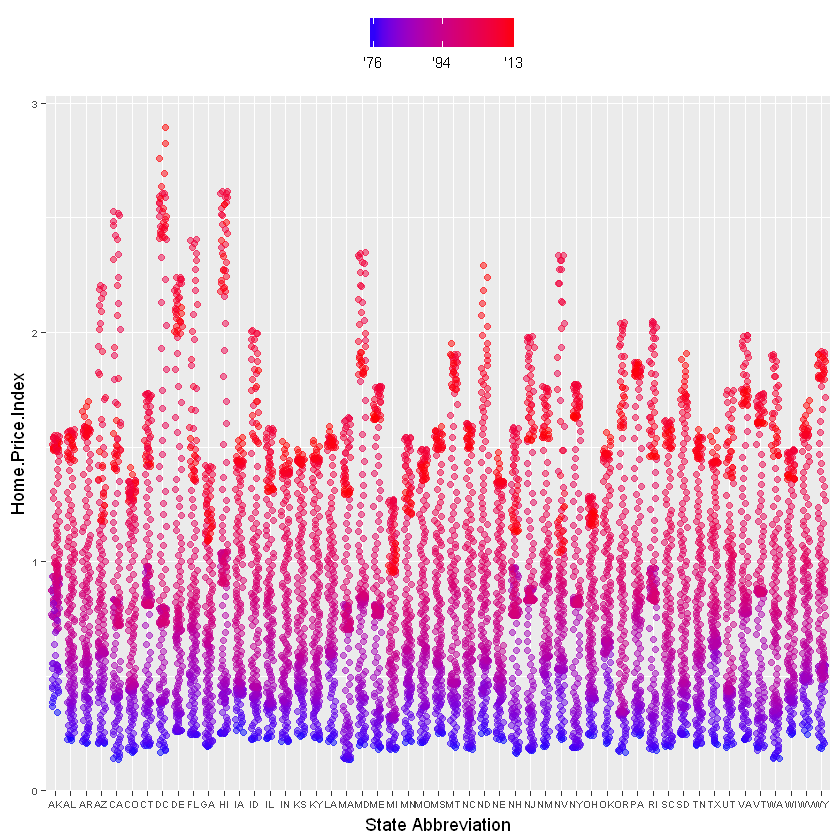

In [13]:
p4 +scale_x_discrete(name="State Abbreviation") + scale_color_continuous(name="",breaks = c(1976, 1994, 2013),labels = c("'76", "'94", "'13"),low = "blue", high = "red")

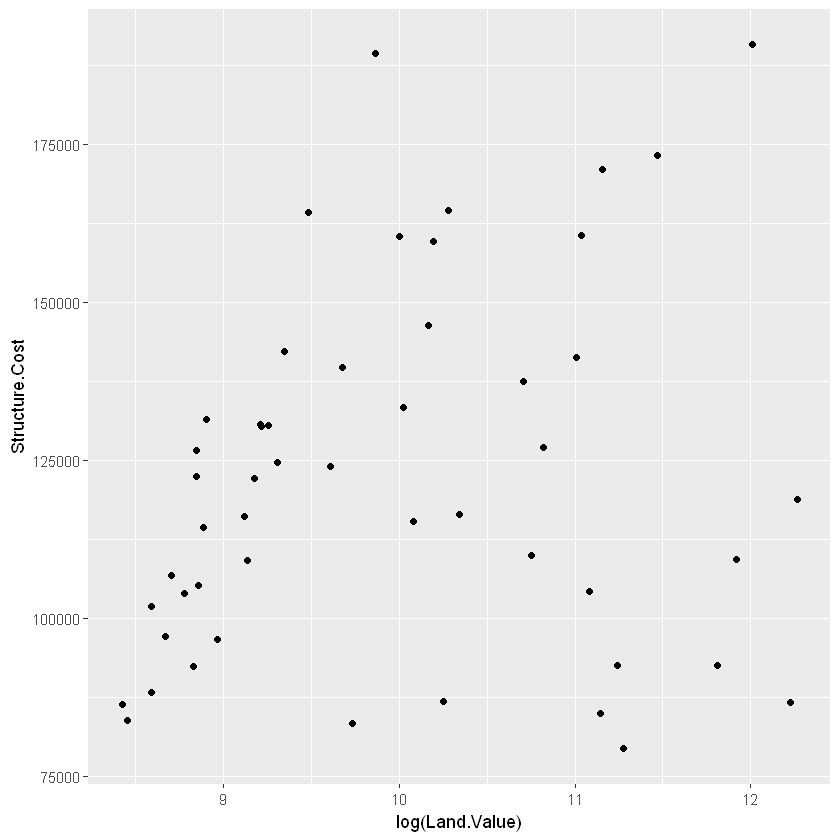

In [14]:
ggplot(hp2001,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

Warning message:
"Removed 1 rows containing missing values (geom_point)."

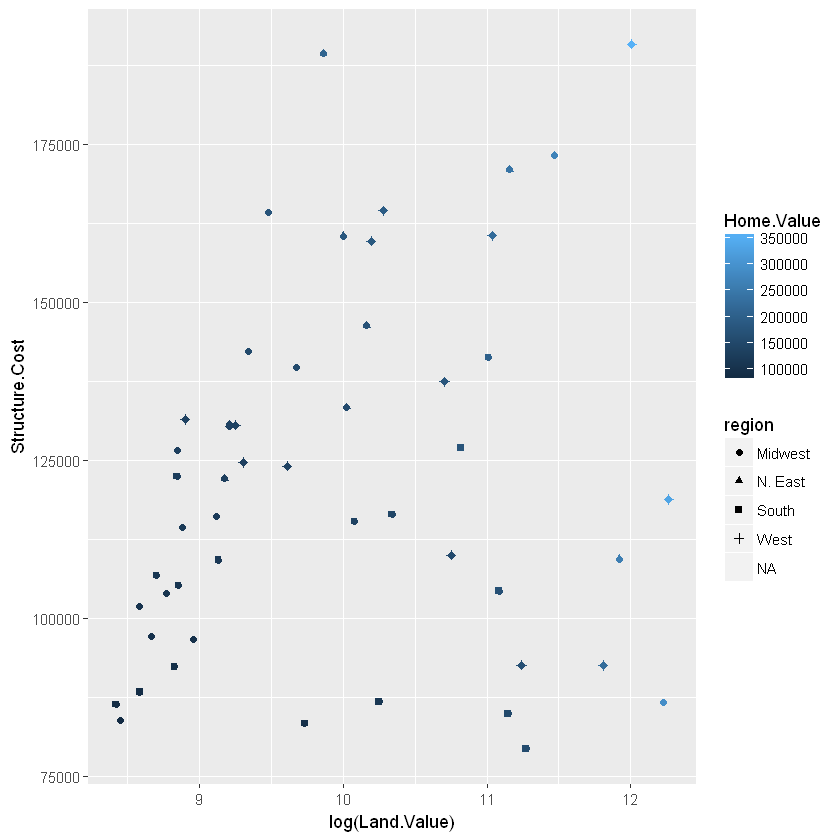

In [15]:
plt +
  geom_point(aes(color=Home.Value, shape = region))

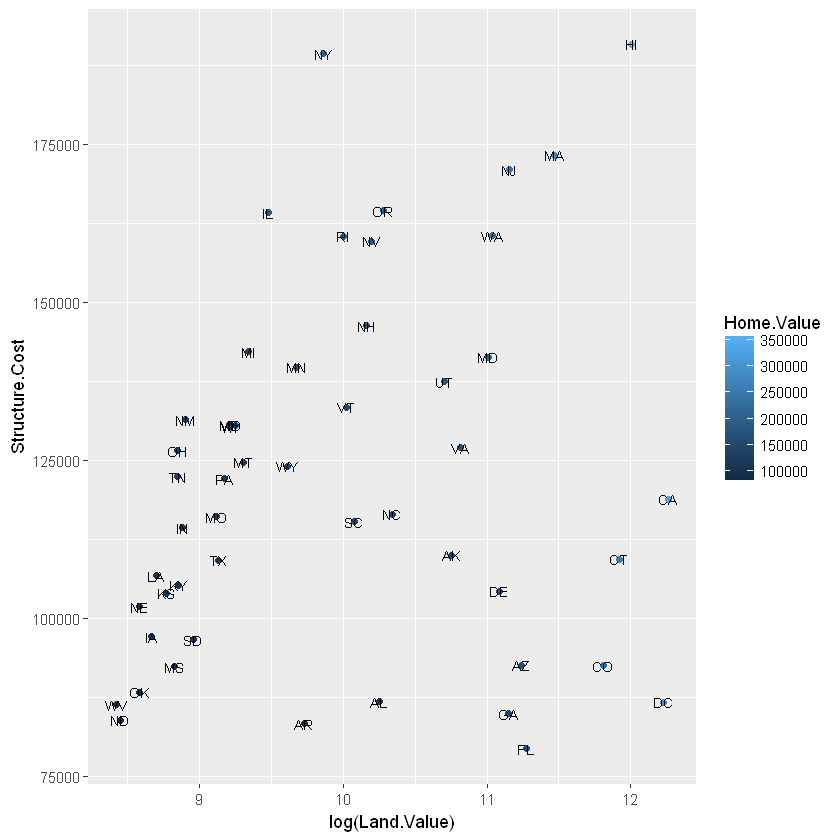

In [16]:
plt + geom_text(aes(label=State), size = 3)

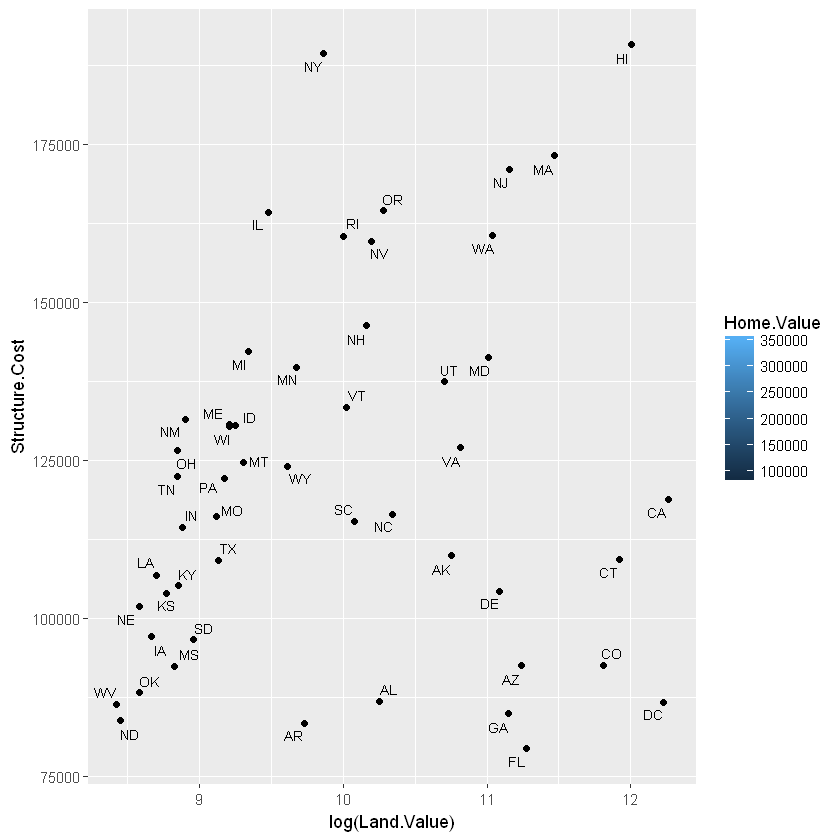

In [17]:
plt + geom_point() + geom_text_repel(aes(label=State), size = 3)

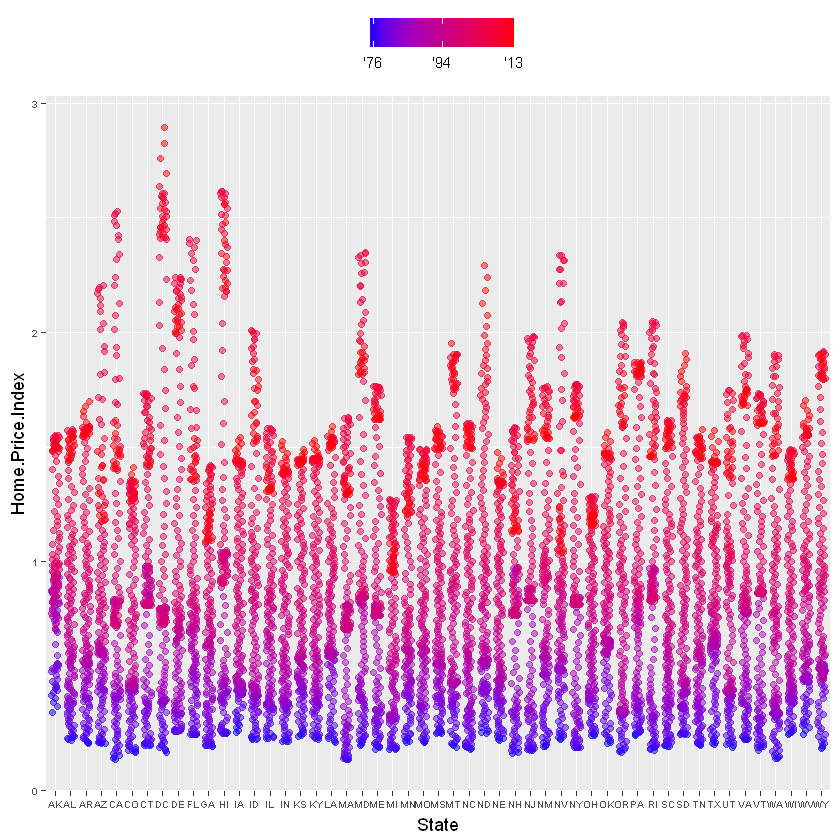

In [18]:
p4 +scale_color_continuous(name="",breaks = c(1976, 1994, 2013),labels = c("'76", "'94", "'13"),low = ("blue"), high = ("red"))

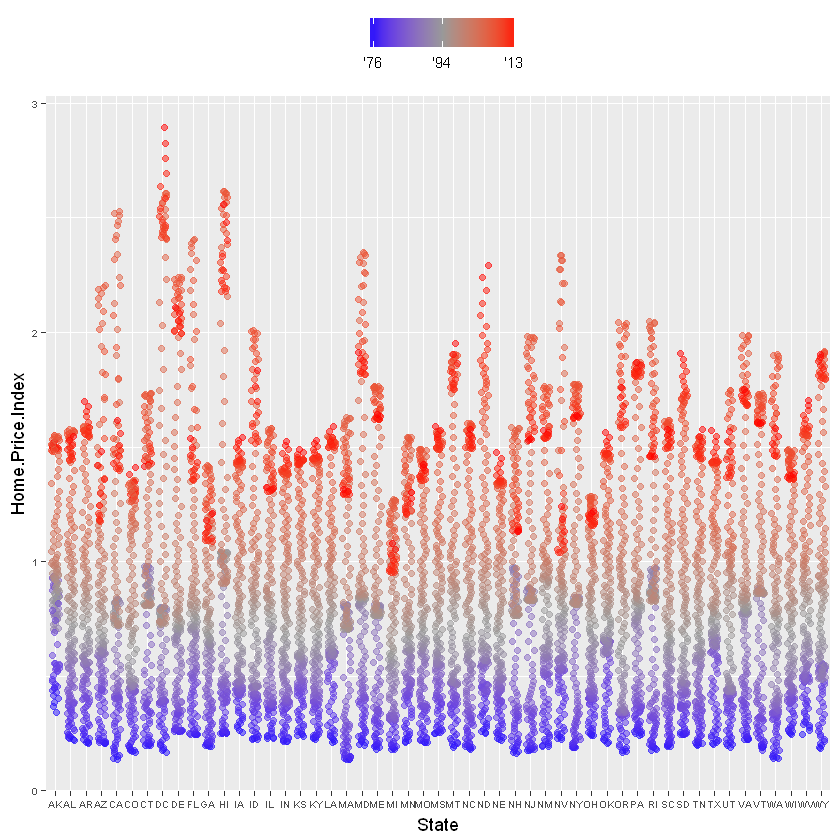

In [19]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = ("blue"),
                        high = ("red"),
                        mid = "gray60",
                        midpoint = 1994)

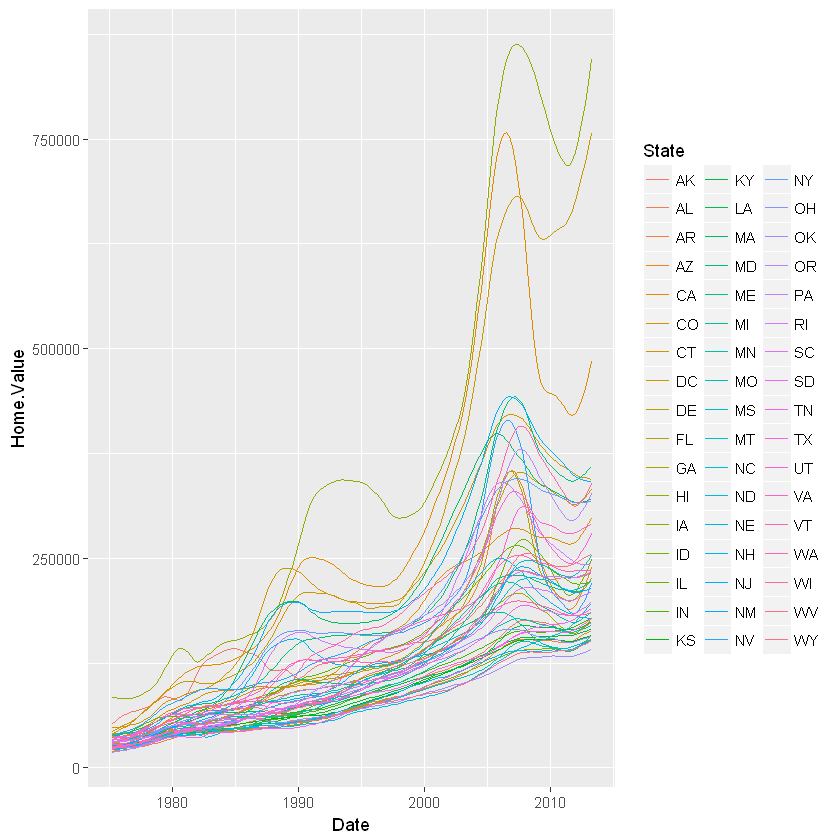

In [20]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

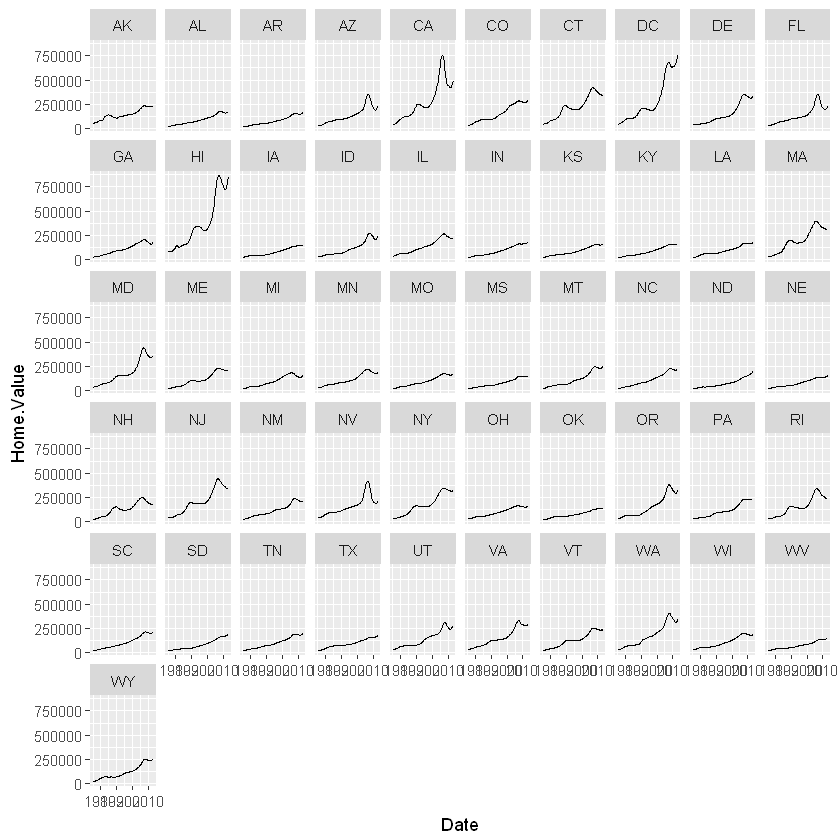

In [21]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

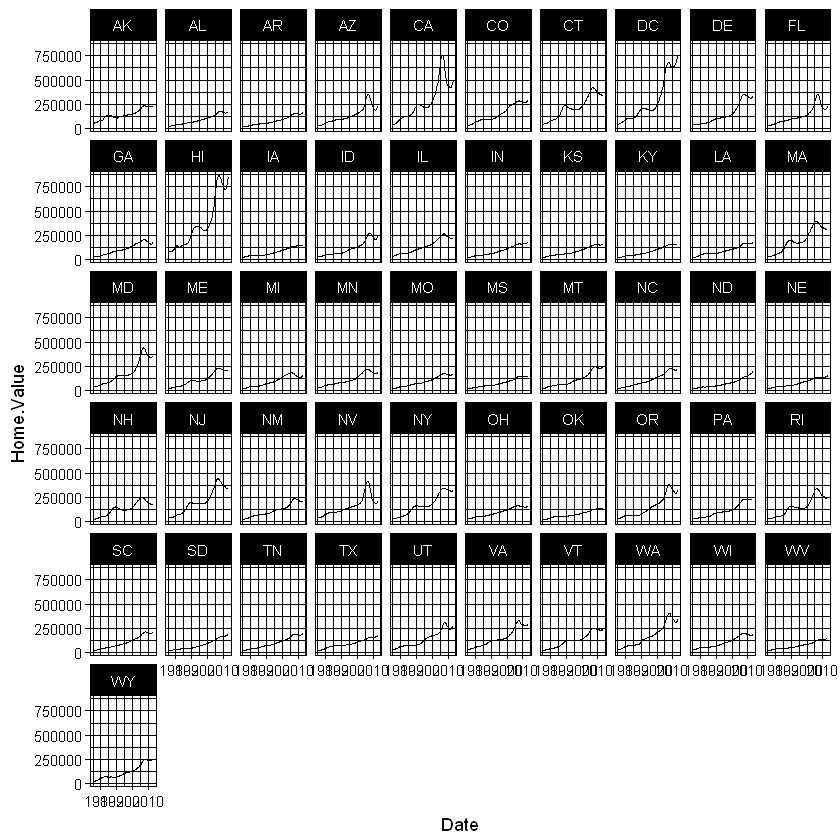

In [22]:
p5 + theme_linedraw()

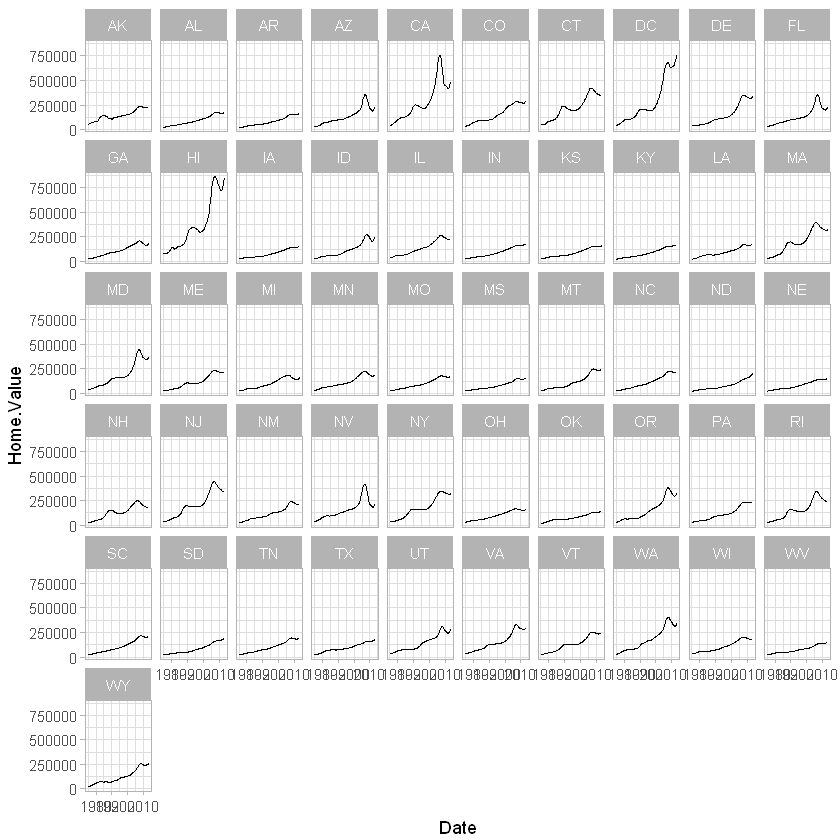

In [23]:
p5 + theme_light()

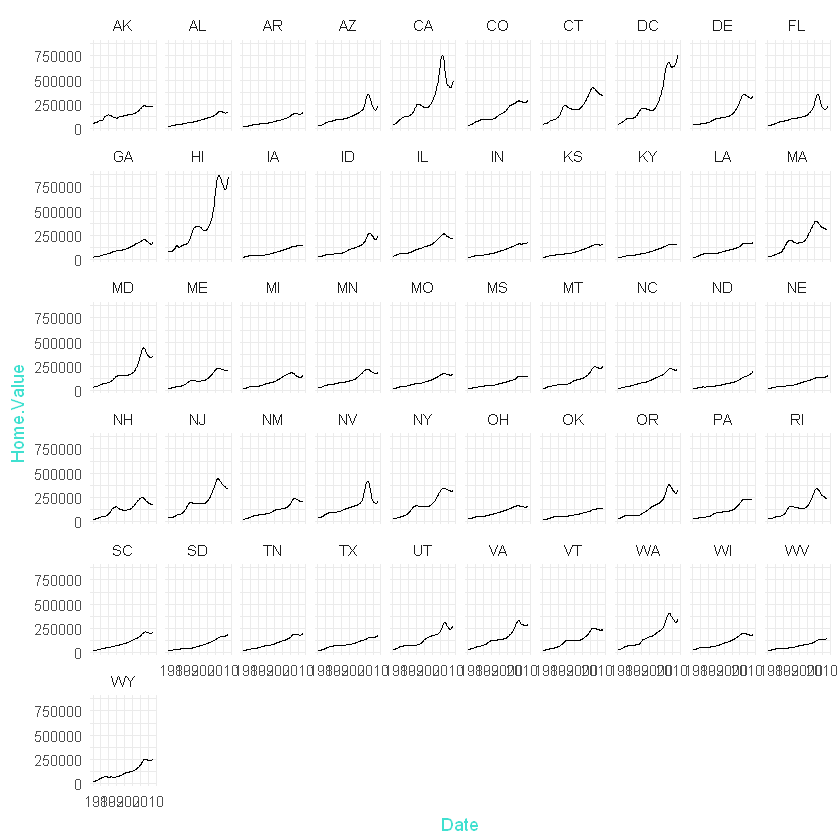

In [24]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

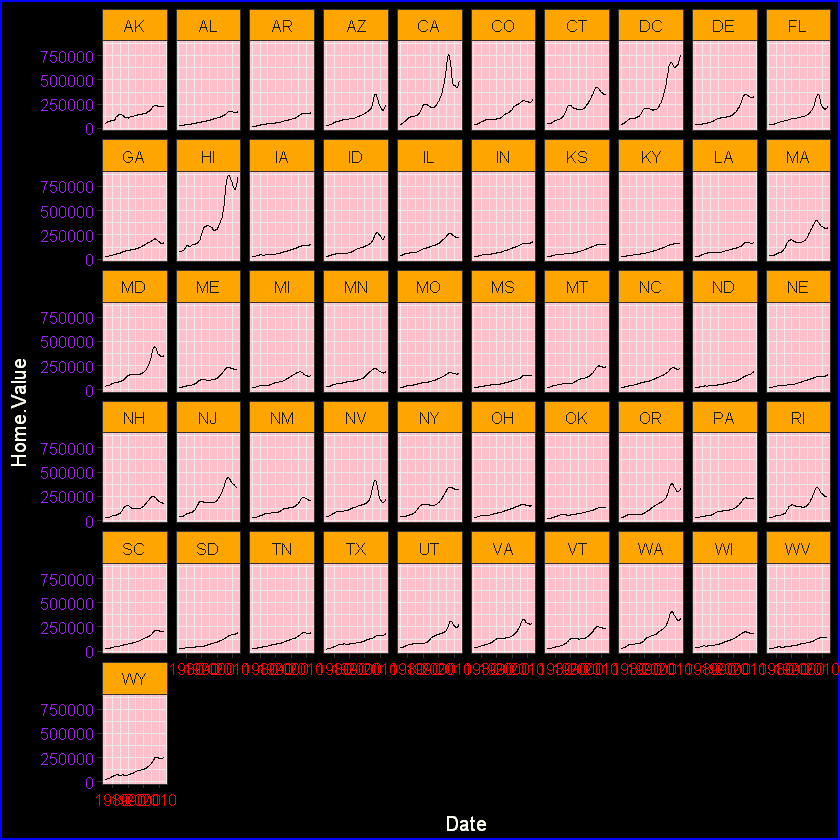

In [25]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = ("orange")))

p5 + theme_new

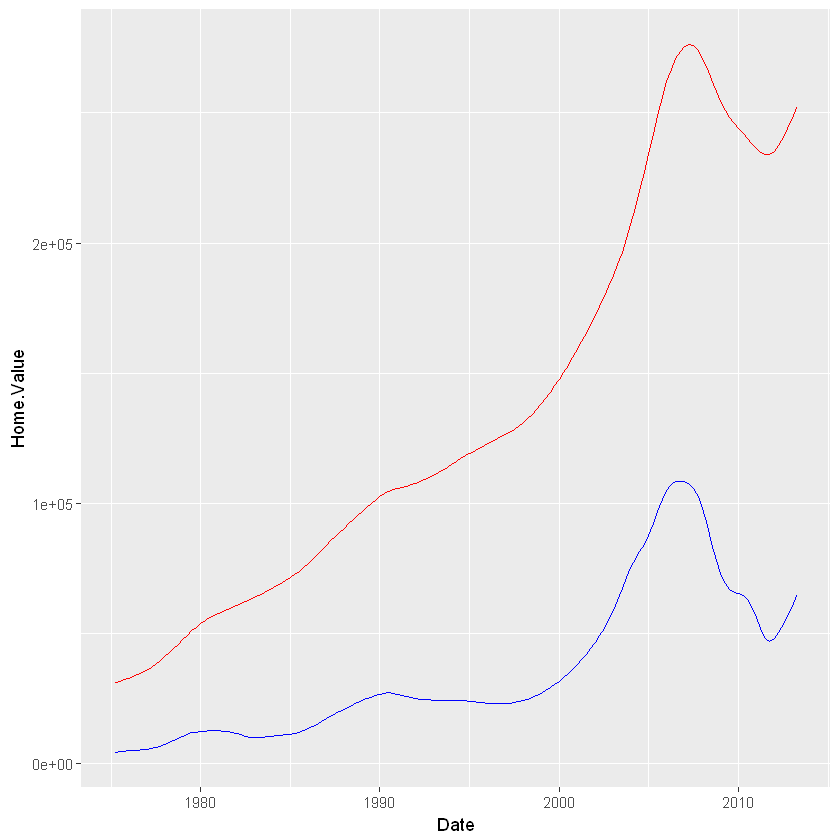

In [26]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

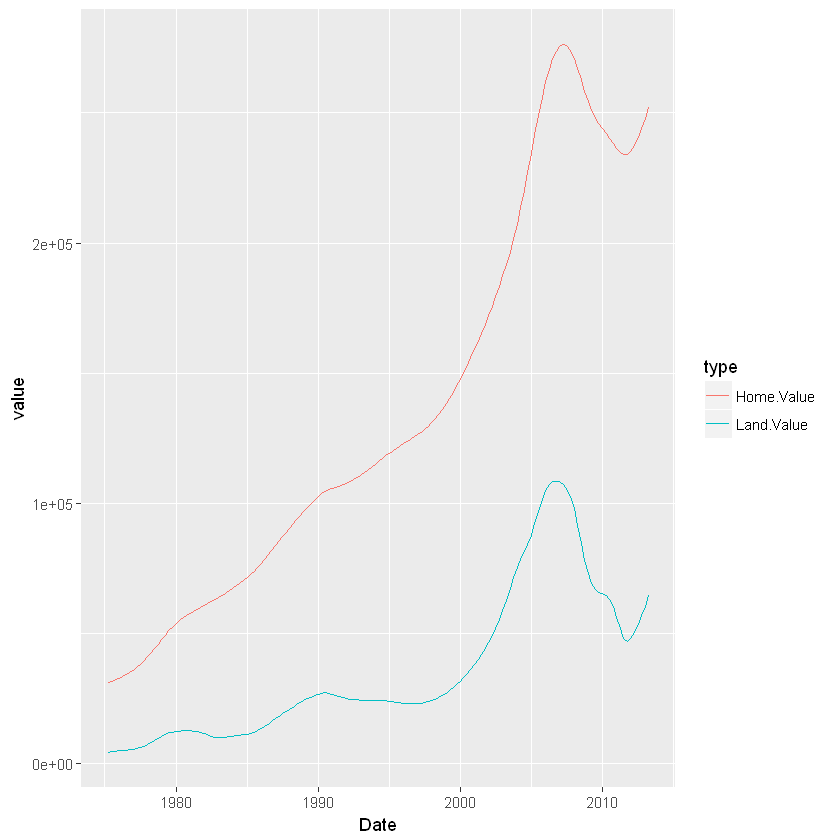

In [27]:
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()